# Preliminary of hack-phenomx env and inital development tasks
* Compare PhenomXHM modes to NR data
  * Load NR data
  * Generate model waveform 
  * Compare by plotting FD waveforms (different modes)
* Apply test modifation to PhenomXHM ringdown frequency and compare to NR and default PhenomXHM

In [37]:
# Setup the notebook's environment
import lalsimulation as lalsim
import lal
import numpy as np
from matplotlib.pyplot import *
from positive import *
from nrutils import lalphenom
from positive.units import *
from nrutils import scsearch,gwylm

In [2]:
# Let the user know where lalsimulation lives
alert('We are getting our LALSimulation from:\n%s'%green(lalsim.__path__[0]))

(notebook)>> We are getting our LALSimulation from:
/Users/book/opt/anaconda2/envs/hack-phenomx/lib/python2.7/site-packages/lalsimulation


## Load reference NR data

In [39]:
# Find a catalog entry of interest using a keyword search
a = scsearch(keyword='q8a08t120',verbose=True)[0]

(scsearch)>> Found keyword (=q8a08t120) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
(scsearch)>> ## Found 1 possibly degenerate simulations:
(scsearch)>> [0001][hogshead] q8precessing: 1chi0.80-p-q8.00	(q8a08t120dP2_r03_T_96_360)



In [41]:
# Load the realted NR waveform
y = gwylm(a,lm=[ (2,2),(2,1),(3,3),(3,2),(4,4) ],verbose=True,dt=0.5,clean=True)

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.5) keyword.
(gwylm)>> Found enforce_m_relative_sign_convention (=True) keyword.
(gwylm)>> Found lm (=[(2, 2), (2, 1), (3, 3), (3, 2), (4, 4)]) keyword.
(gwylm)>> Found load_dynamics (=True) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0xb2599abe0>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__init__)>> Using default M_RELATIVE_SIGN_CONVENTION of 1
(gwylm)>> The (extraction_parameter,level) is (5,7), which differs from the config values of (5,5). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2), (2, 1), (3, 3), (3, 2), (4, 4)]
(load)>> Using the default extraction_parameter of 5
(load)>> Loading: psi3col.r5.l7.l2.m2.gz
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enfo

## Compute model waveform for comparison

In [5]:
lalparams = lal.CreateDict()
def PolarizationsFD(approximant, modeList, threshold, m1, m2, s1, s2, delta_f, phiRef):
      
    ModeArray = lalsim.SimInspiralCreateModeArray()
    for mode in modeList:
        lalsim.SimInspiralModeArrayActivateMode(ModeArray, mode[0], mode[1])
    lalsim.SimInspiralWaveformParamsInsertModeArray(lalparams, ModeArray)
        
    
    lalsim.SimInspiralWaveformParamsInsertPhenomXHMThresholdMband(lalparams, threshold)
   
    
    #
    f_min       = 10.0
    f_max       = 2048.0
    Omega       = 0.
    inclination = 1.3232
    distance    = 100.*1.0e6*lal.PC_SI
    
    hp, hc = lalsim.SimInspiralChooseFDWaveform(m1=lal.MSUN_SI*m1,
                                            m2=lal.MSUN_SI*m2, 
                                            S1x=s1[0], S1y=s1[1], S1z=s1[2],
                                            S2x=s2[0], S2y=s2[1], S2z=s2[2],
                                            distance=distance, 
                                            inclination=inclination, 
                                            LALpars=lalparams,
                                            phiRef=phiRef, 
                                            f_ref=f_min,
                                            deltaF=delta_f,
                                            f_min=f_min,
                                            f_max=f_max,
                                            longAscNodes=Omega,
                                            eccentricity=0.0,
                                            meanPerAno=0.0,
                                            approximant=approximant) 
        
    freqs = np.arange(len(hp.data.data)) * delta_f
    
    return hp, hc, freqs

In [35]:

modeList = [ [3,3] ]
threshold = 0
m1 = 20.0
m2 = 60.0
s1 = [0,0,0]
s2 = [0,0,0]
delta_f = 0.125
phiRef = 3.4332

hp, hc, f = PolarizationsFD(lalsim.IMRPhenomXHM, modeList, threshold, m1, m2, s1, s2, delta_f, phiRef)

h = hp.data.data + 1j*hc.data.data

(10.0, 2048.0)

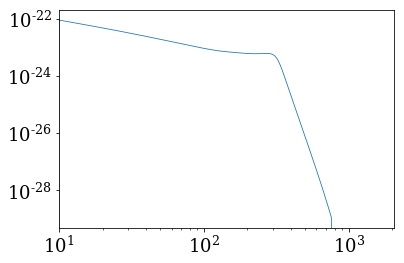

In [36]:
plot( f, abs(h) )
xscale('log')
yscale('log')
xlim( f[find(abs(h)>0)[0]],max(f) )